## Input data


### Using combine thickness

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from PIL import Image
from io import BytesIO

plt.style.use('classic')
%matplotlib inline

In [49]:
# read excel file
df = pd.read_excel('C:/Users/acc_a/OneDrive/PhOLED.xlsx', sheetname='combined thickness')
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(162, 23)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,lumo_HTL2,homo_HTL2,total_HTL_thickness,triplet_HTL,lumo_EML,homo_EML,...,homo_dopant,triplet_dopant,dopant_percentage,triplet_ETL,total_ETL_thickness,lumo_ETL2,homo_ETL2,cathode_workfunction,thickness_EIL,efficiency
0,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.27,...,5.7,2.7,11.0,2.6,35,2.8,6.2,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,2.00,5.50,...,5.7,2.7,15.0,2.6,35,2.8,6.2,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.27,...,5.7,2.7,15.0,2.6,35,2.8,6.2,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.50,...,5.7,2.7,15.0,2.6,35,2.8,6.2,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.27,...,5.7,2.7,20.0,2.6,35,2.8,6.2,2.8,10.0,8.0


In [50]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0] #check wnumber of null values in column

# np.nonzero(pd.isnull(df.values).any(1)) #check the index of missing value

#drop the missing data
# df.dropna(axis=0, inplace=True)
# print(df.shape)

Series([], dtype: int64)

In [51]:
X = df.iloc[:, :-1]
y = df[['efficiency']]
print(X.shape)
X.head()

(162, 22)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,lumo_HTL2,homo_HTL2,total_HTL_thickness,triplet_HTL,lumo_EML,homo_EML,...,lumo_dopant,homo_dopant,triplet_dopant,dopant_percentage,triplet_ETL,total_ETL_thickness,lumo_ETL2,homo_ETL2,cathode_workfunction,thickness_EIL
0,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.27,...,3.0,5.7,2.7,11.0,2.6,35,2.8,6.2,2.8,10.0
1,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,2.00,5.50,...,3.0,5.7,2.7,15.0,2.6,35,2.8,6.2,2.8,10.0
2,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.27,...,3.0,5.7,2.7,15.0,2.6,35,2.8,6.2,2.8,10.0
3,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.50,...,3.0,5.7,2.7,15.0,2.6,35,2.8,6.2,2.8,10.0
4,5.2,25.0,3.3,5.2,3.3,5.2,0,0.0,1.83,5.27,...,3.0,5.7,2.7,20.0,2.6,35,2.8,6.2,2.8,10.0


In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

rs = 26

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=rs)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(n_estimators=130, random_state=7)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=4, shuffle=True, random_state=rs)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.65561059  0.68010986  0.67635763  0.59824728]
mean R2 score:  0.652581340047 

RMSE mean:  7.8480370395 

R-squared test:  0.662846317489
RMSE:  8.17589630939


In [54]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))
importance = [round(float(i), 3) for i in importance]

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       triplet_ETL         0.276
1       triplet_HOST        0.131
2       total_ETL_thickness 0.121
3       homo_EML            0.11
4       thickness_EIL       0.058
5       thickness_HIL       0.039
6       lumo_EML            0.038
7       total_HTL_thickness 0.028
8       homo_HIL            0.027
9       thickness_EML       0.027
10      homo_ETL2           0.022
11      homo_HTL2           0.018
12      dopant_percentage   0.017
13      triplet_HTL         0.016
14      homo_dopant         0.013
15      lumo_ETL2           0.012
16      triplet_dopant      0.012
17      cathode_workfunction0.009
18      homo_HTL1           0.008
19      lumo_HTL1           0.008
20      lumo_dopant         0.007
21      lumo_HTL2           0.004


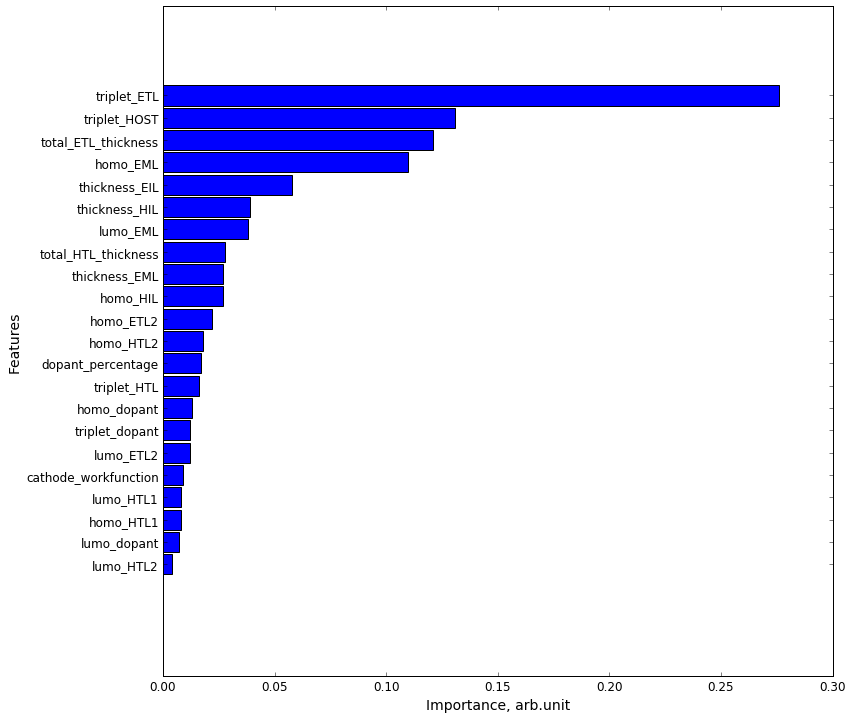

In [55]:
importance, names = zip(*sorted(zip(importance, names), reverse=False))
x = np.arange(len(X.columns))
plt.figure(figsize=(12,12));
fig = plt.barh(x, importance, 0.9, align='center')
plt.xlabel('Importance, arb.unit',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.yticks(x,names,fontsize=12)
plt.xticks( fontsize=12);

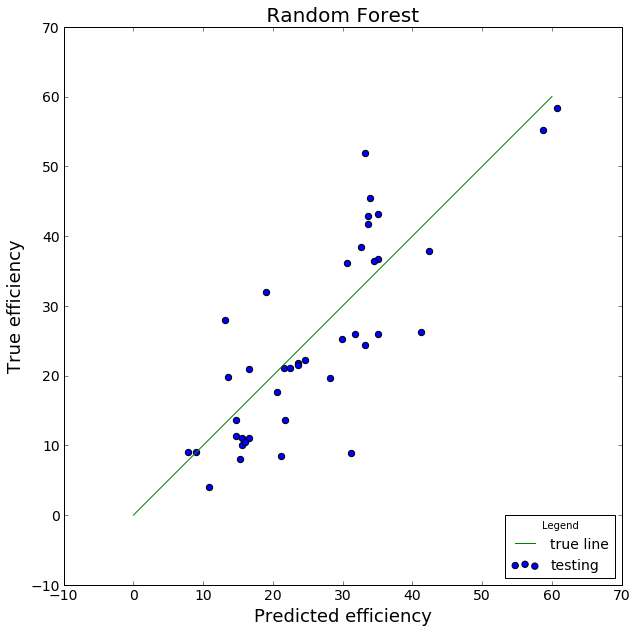

In [18]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
# plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [ ]:
# test on new data with 22 features

df2 = pd.read_excel('C:/Users/acc_a/Desktop/predict.xlsx', sheetname='22')
df2 = df2[list(df2.columns)[1:]]
print(df2.shape)

X2 = df2.iloc[:, :-1]

y_predictions2 = regressor.predict(X2)
y_predictions2

### Using selected features

In [60]:
# read excel file
df = pd.read_excel('C:/Users/acc_a/OneDrive/PhOLED.xlsx', sheetname='selected features')
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(162, 8)


,total_HTL_thickness,homo_EML,triplet_HOST,thickness_EML,triplet_ETL,total_ETL_thickness,thickness_EIL,efficiency
0,0,5.27,2.88,35,2.6,35,10.0,5.0
1,0,5.50,2.87,35,2.6,35,10.0,4.0
2,0,5.27,2.88,35,2.6,35,10.0,9.0
3,0,5.50,2.88,35,2.6,35,10.0,12.0
4,0,5.27,2.88,35,2.6,35,10.0,8.0


In [61]:
X = df.iloc[:, :-1]
y = df[['efficiency']]
print(X.shape)
X.head()

(162, 7)


,total_HTL_thickness,homo_EML,triplet_HOST,thickness_EML,triplet_ETL,total_ETL_thickness,thickness_EIL
0,0,5.27,2.88,35,2.6,35,10.0
1,0,5.50,2.87,35,2.6,35,10.0
2,0,5.27,2.88,35,2.6,35,10.0
3,0,5.50,2.88,35,2.6,35,10.0
4,0,5.27,2.88,35,2.6,35,10.0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=rs)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(n_estimators=130, random_state=7)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=4, shuffle=True, random_state=rs)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.63148768  0.71159791  0.58791207  0.60805409]
mean R2 score:  0.634762937137 

RMSE mean:  8.0242696507 

R-squared test:  0.637278549717
RMSE:  8.4802379947


In [64]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))
importance = [round(float(i), 3) for i in importance]

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       triplet_ETL         0.307
1       triplet_HOST        0.18
2       total_ETL_thickness 0.171
3       homo_EML            0.146
4       thickness_EIL       0.084
5       total_HTL_thickness 0.062
6       thickness_EML       0.05


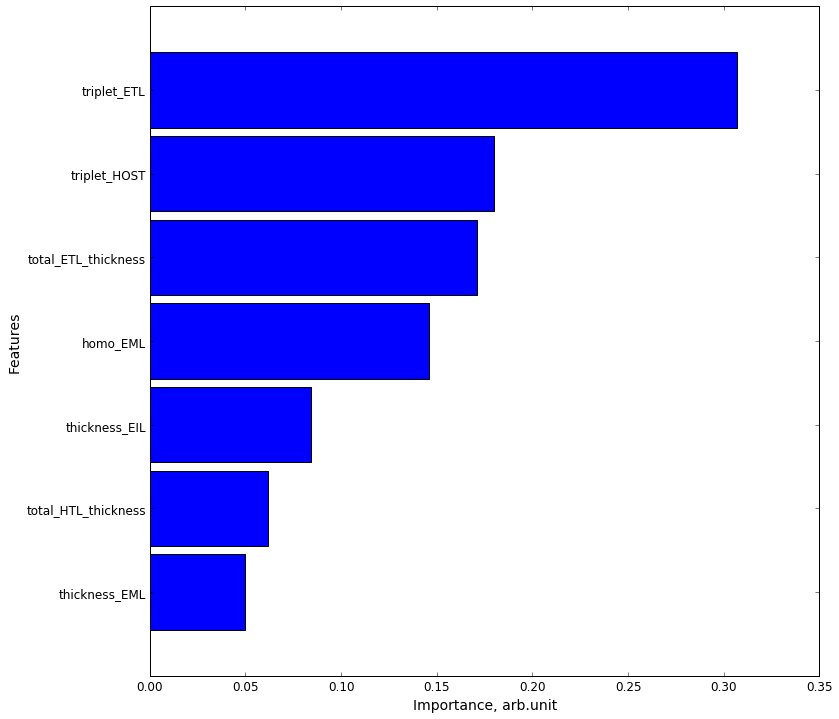

In [65]:
importance, names = zip(*sorted(zip(importance, names), reverse=False))
x = np.arange(len(X.columns))
plt.figure(figsize=(12,12));
fig = plt.barh(x, importance, 0.9, align='center')
plt.xlabel('Importance, arb.unit',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.yticks(x,names,fontsize=12)
plt.xticks( fontsize=12);

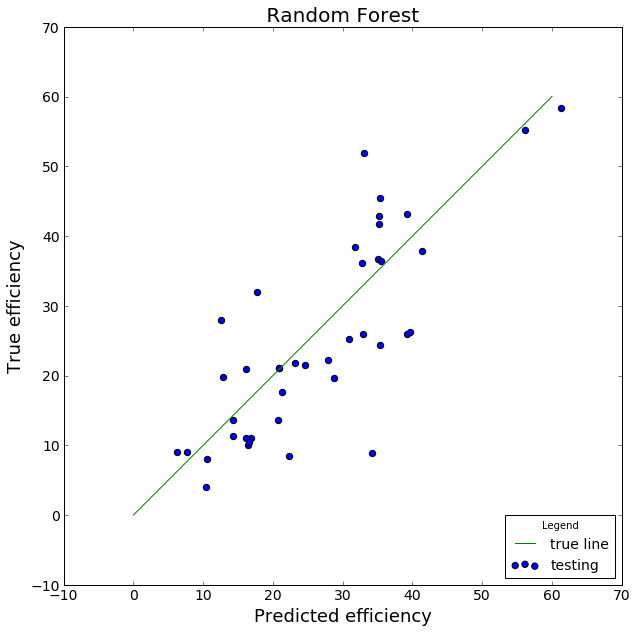

In [66]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
# plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [67]:
# test on new data with 7 features
df3 = pd.read_excel('C:/Users/acc_a/Desktop/predict.xlsx', sheetname='7')
df3 = df3[list(df3.columns)[1:]]
print(df3.shape)

X3 = df3.iloc[:, :-1]

y_predictions3 = regressor.predict(X3)
y_predictions3

(4, 8)


array([ 20.66373176,  20.66373176,  31.45333925,  20.66373176])

(4, 23)
